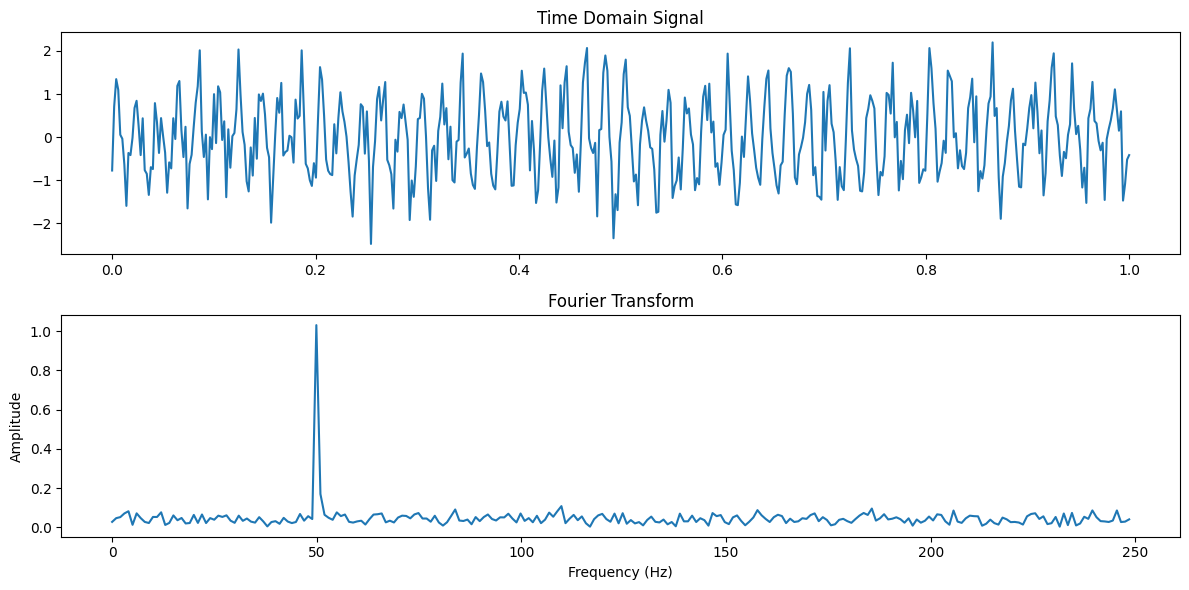

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Time domain signal: A simple sine wave with some noise
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.normal(size=t.shape)

# Fourier Transform
N = len(t)
T = t[1] - t[0]  # Sample spacing
yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

# Plot the time domain signal and its Fourier Transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")

plt.subplot(2, 1, 2)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.savefig('fourier.png')
plt.show()



c:\Users\leoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
c:\Users\leoni\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_functions.py:141: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


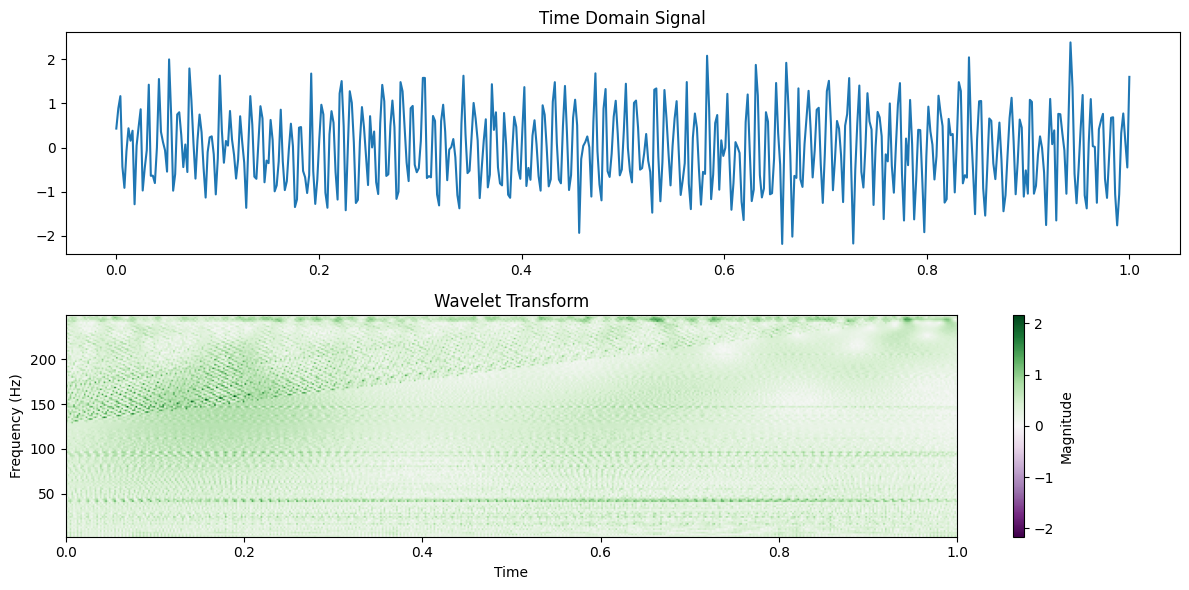

In [3]:
import pywt

# Create a sample signal: a sine wave with added noise
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 100 * t) + 0.5 * np.random.normal(size=t.shape)

# Perform Continuous Wavelet Transform
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)
coeffs, frequencies = pywt.cwt(signal, scales, wavelet)

# Convert scales to pseudo-frequencies
fs = 1 / (t[1] - t[0])
frequencies = pywt.scale2frequency(wavelet, scales) * fs

# Plot the time domain signal and its Wavelet Transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coeffs), extent=[0, 1, frequencies[-1], frequencies[0]], cmap='PRGn', aspect='auto',
           vmax=abs(coeffs).max(), vmin=-abs(coeffs).max())
plt.title("Wavelet Transform")
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Magnitude')

plt.tight_layout()
plt.savefig('wavelet.png')
plt.show()



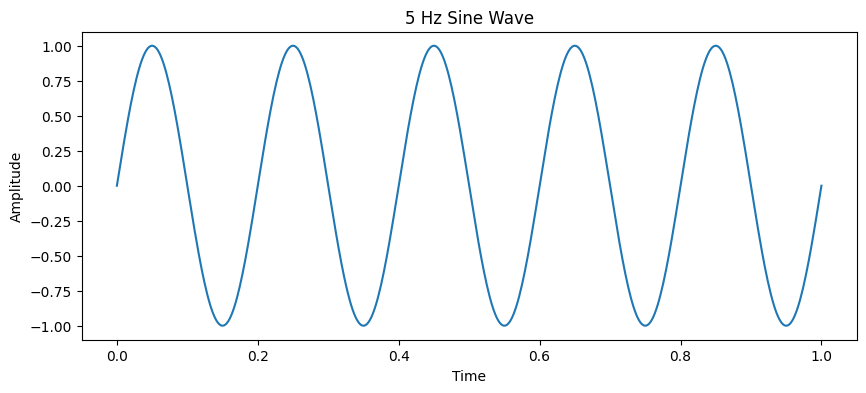

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time domain
t = np.linspace(0, 1, 500)
sine_wave = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave)
plt.title("5 Hz Sine Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [9]:
import pywt

# Time domain
t = np.linspace(-1, 1, 500)
morlet_wavelet = pywt.Wavelet('haar')

# Getting the wavelet function (psi)
wavelet_function = morlet_wavelet.wavefun(level=1)

plt.figure(figsize=(10, 4))
plt.plot(wavelet_function.real)
plt.title("Morlet Wavelet")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


AttributeError: 'list' object has no attribute 'real'

<Figure size 1000x400 with 0 Axes>

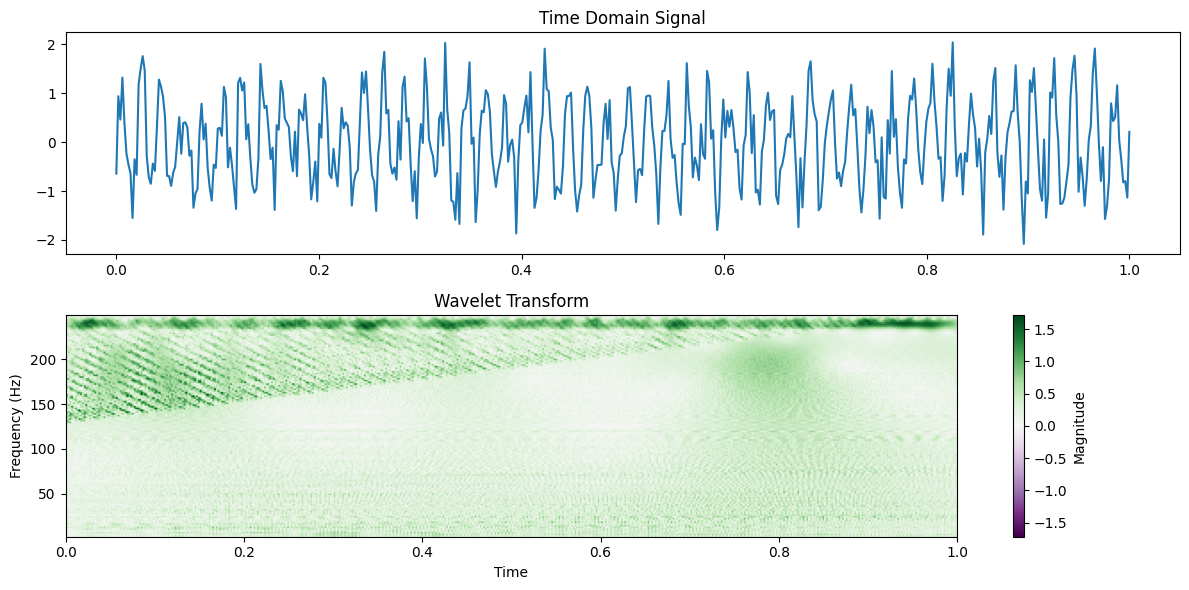

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Create a sample signal: a sine wave with added noise
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.normal(size=t.shape)

# Perform Continuous Wavelet Transform
wavelet = 'cmor'  # Complex Morlet wavelet
scales = np.arange(1, 128)  # Scale range

# Compute the CWT
coeffs, freqs = pywt.cwt(signal, scales, wavelet)

# Convert scales to pseudo-frequencies
fs = 1 / (t[1] - t[0])  # Sampling frequency
pseudo_freqs = pywt.scale2frequency(wavelet, scales) * fs

# Plot the time domain signal and its Wavelet Transform
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coeffs), extent=[0, 1, pseudo_freqs[-1], pseudo_freqs[0]], cmap='PRGn', aspect='auto',
           vmax=abs(coeffs).max(), vmin=-abs(coeffs).max())
plt.title("Wavelet Transform")
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Magnitude')

plt.tight_layout()
plt.show()
